# Lecture 12: Linear algebra III

## Lecture overview

1. [What are eigenvalues and eigenvectors?](#section1)
2. [Why should be care about eigenvalues and eigenvectors?](#section2)
3. [Finding eigenvalues](#section3)
4. [Finding eigenvectors](#section4)

<span id='section1'></span>
## 1. What are eigenvalues and eigenvectors?
<hr>

A number $\lambda$ is an **eigenvalue** of matrix $\textbf{M}$ if there exists a non-zero vector, $\vec{v}$, that satisfies

$$
\mathbf{M} \vec{v} = \lambda \vec{v}
$$

Every non-zero vector $\vec{v}$ satisfying this equation is a **right eigenvector** of $\mathbf{M}$ associated with eigenvalue $\lambda$.

Every non-zero vector $\vec{u}$ satisfying

$$
\vec{u}\mathbf{M} = \lambda \vec{u}
$$

is a **left eigenvector** of $\mathbf{M}$ associated with eigenvalue $\lambda$.

<span id='section2'></span>
## 2. Why should we care about eigenvalues and eigenvectors?
<hr> 

Let's say $\mathbf{M}$ describes the dynamics of our biological variables, $\vec{n}$, which might be the numbers of different types of individuals or the frequency of alleles at different loci, and for concreteness let's just say we are working in discrete time, $\vec{n}(t+1) = \mathbf{M} \vec{n}(t)$ (but similar arguments hold for continuous time). 

Now notice that if our system, $\vec{n}(t)$, ever approaches a right eigenvalue, $\vec{v}$, the dynamics reduce to simple exponential growth $\vec{n}(t+1) = \mathbf{M} \vec{n}(t) = \mathbf{M} \vec{v} = \lambda \vec{v}$ at rate $\lambda$ in direction $\vec{v}$. In other words, the eigenvalues describe the rate at which our system grows or shrinks along their associated eigenvectors.

More generally, even when $\vec{n}$ is not near a right eigenvector, the right eigenvectors provide a new coordinate system in which the dynamics of our system are easier to understand. 

To see this, let's take $\mathbf{M} = \begin{pmatrix} 1 & 1 \\ 1/2 & 3/2 \end{pmatrix}$. The eigenvalues of $\mathbf{M}$ are $\lambda_1 = 2$ and $\lambda_2 = 1/2$. The right eigenvectors associated with these two eigenvalues are $\vec{v}_1 = \begin{pmatrix} 1 \\ -1/2 \end{pmatrix}$ and $\vec{v}_2 = \begin{pmatrix} 1 \\ 1 \end{pmatrix}$, respectively. 

The right eigenvectors are plotted as red vectors in the plot below. The initial state of the sytem, $\vec{n}(0)$, is given by the blue vector. Thinking of the eigenvectors as a new coordinate system for our dynamics, we draw dashed gray lines that are parallel to the two eigenvectors, connecting $\vec{n}(0)$ to the two eigenvectors. Where these dashed gray lines intersect the eigenvalues indicates the value of $\vec{n}(0)$ in the new coordinate system. 

To calculate the state of the system in the next time step, $\vec{n}(1) = \mathbf{M}\vec{n}(0)$, we can then simply multiply the values of $\vec{n}(0)$ in the new coordinate system by the eigenvalues. In this example, we multiply the distance of $\vec{n}(0)$ along the first eigenvector by $\lambda_1$ and the distance of $\vec{n}(0)$ along the second eigenvector by $\lambda_2$, which gives $\vec{n}(1)$ in orange. We can continue doing this to calculate $\vec{n}(2)$ (plotted in green), and so on...

Not only do the right eigenvectors define a more convenient coordinate system for our dynamics, you may also notice in the plot below that the system approaches one of the eigenvectors, suggesting that the long-term dynamics of the system can be predicted based on only one of the eigenvalues and it's associated right eigenvector (a fact we will later prove). 

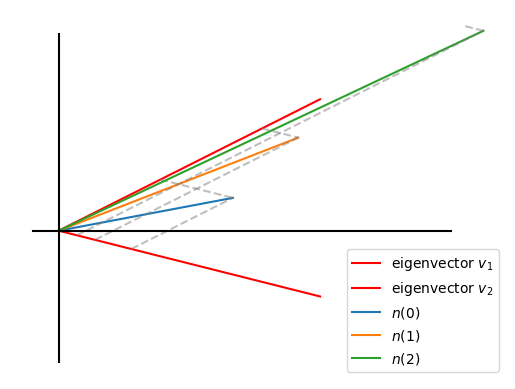

In [131]:
import numpy as np
import matplotlib.pyplot as plt

# define objects
M = np.array([[1,1],[1/2,3/2]]) #matrix
e1, e2 = np.linalg.eigvals(M) #eigenvalues
vs = np.linalg.eig(M)[1] #eigenvectors
v1 = vs[:,0]; v1 = v1/v1[0] #first eigenvector normalized by first entry
v2 = vs[:,1]; v2 = v2/v2[0] #second eigenvector normalized by first entry

n0 = np.array([2/3,1/4]) #initial values of our variables
n1 = M @ n0 #n1 = M*n0
n2 = M @ n1 #n2 = M*n1

# plot
xmin,xmax = -0.1,1.5 #x limits
ymin,ymax = -1,1.5 #y limits
fig, ax = plt.subplots()

# plot the eigenvectors
for i,v in enumerate([v1,v2]):
    ax.plot([0,v[0]], # x values
            [0,v[1]], # y values
            c='r',
            label='eigenvector $v_{%d}$'%(i+1)) #aesthetics
    
# plot the state of the system
for i,n in enumerate([n0,n1,n2]):
    ax.plot([0,n[0]],
            [0,n[1]],
           label='$n(%d)$'%i)
    # parallel lines
    for a,b in [[v1,v2],[v2,v1]]:
        yshift = n[1] - a[1]/a[0] * n[0]
        xshift = yshift/(b[1]/b[0]-a[1]/a[0])
        yshift = xshift * b[1]/b[0]
        ax.plot([0 + xshift, n[0]],
                [0 + yshift, n[1]],
                c='gray', ls='--', alpha=0.5)

# aesthetics
ax.axis('off') #remove frame
ax.plot([0,0],[ymin,ymax], c='k') #x axis
ax.plot([xmin,xmax],[0,0], c='k') # yaxis
ax.legend()

plt.show()

<span id='section3'></span>
## 3. Finding eigenvalues
<hr>

To find the eigenvalues, first notice that if we try to use linear algebra to solve for the right eigenvector, $\vec{v}$, we find

$$
\begin{aligned} 
\mathbf{M}\vec{v} &= \lambda\vec{v}\\
\mathbf{M}\vec{v} - \lambda\vec{v} &= \vec{0}\\
\mathbf{M}\vec{v} - \lambda\mathbf{I}\vec{v} &= \vec{0} \\
(\mathbf{M} - \lambda\mathbf{I})\vec{v} &= \vec{0}\\
\vec{v} &= (\mathbf{M} - \lambda\mathbf{I})^{-1}\vec{0} \\
\vec{v} &= \vec{0}
\end{aligned}
$$

where $\mathbf{I}$ is the identity matrix and $\vec{0}$ is a vector of zeros.

But above we've said that $\vec{v}$ is a *non-zero* vector! This is a contradiction.

This contradiction implies that we did something wrong in our calculations. The only place we made any assumptions was in our last step, where we assumed $(\mathbf{M} - \lambda\mathbf{I})$ was invertible.

We then conclude that $(\mathbf{M} - \lambda\mathbf{I})$ is non-invertible and therefore must have a determinant of zero, $|\mathbf{M} - \lambda\mathbf{I}|=0$. Interestingly, this last equation, $|\mathbf{M} - \lambda\mathbf{I}|=0$, gives us a way to solve for the eigenvalues, $\lambda$, without knowing the eigenvectors, $\vec{v}$!

The determinant of the $n\times n$ matrix $(\mathbf{M} - \lambda\mathbf{I})$ is an $n^{th}$ degree polynomial in $\lambda$, which is called the **characteristic polynomial** of $\mathbf{M}$. Setting this polynomial equal to zero and solving for $\lambda$ gives the $n$ eigenvalues of $\mathbf{M}$: $\lambda_1,\lambda_2,...,\lambda_n$.

For example, in the $n=2$ case we have

$$
\begin{aligned}
\mathbf{M} - \lambda \mathbf{I} &= \begin{pmatrix} m_{11} & m_{12} \\ m_{21} & m_{22} \end{pmatrix} - \lambda \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}\\
&= \begin{pmatrix} m_{11} & m_{12} \\ m_{21} & m_{22} \end{pmatrix} -  \begin{pmatrix} \lambda & 0 \\ 0 & \lambda \end{pmatrix}\\
&= \begin{pmatrix} m_{11} - \lambda & m_{12} \\ m_{21} & m_{22} - \lambda \end{pmatrix}
\end{aligned}
$$

so that the characteristic polynomial is

$$
\begin{aligned}
|\mathbf{M} - \lambda \mathbf{I} | =& (m_{11}-\lambda)(m_{22}-\lambda)-m_{21} m_{12}\\
=&\lambda^2 - (m_{11}+m_{22})\lambda + (m_{11}m_{22}-m_{21}m_{12})\\
=&\lambda^2 - \mathrm{Tr}(\mathbf{M})\lambda + \mathrm{Det}(\mathbf{M})
\end{aligned}
$$

Setting this polynomial equal to zero, the two solutions can be found using the quadratic formula

$$
\lambda = \frac{\mathrm{Tr}(\mathbf{M}) \pm \sqrt{\mathrm{Tr}(\mathbf{M})^2 - 4\mathrm{Det}(\mathbf{M})}}{2}
$$

Note that this shows that even a 2x2 matrix composed of all real numbers can have **complex** eigenvalues if the value within the square root is negative, $\mathrm{Tr}(\mathbf{M})^2 - 4\mathrm{Det}(\mathbf{M}) < 0$.

!!! note

    A complex number has the form $A + B i$, where $A$ and $B$ are real numbers and $i=\sqrt{-1}$. We call $A$ the "real part" and $B$ the "imaginary part". See Box 7.3 in the text for more fun facts.

For example, $\mathbf{M} = \begin{pmatrix} 1 & -1 \\ 1 & 1 \end{pmatrix}$ has $\mathrm{Tr}(\mathbf{M}) = 2$ and $\mathrm{Det}(\mathbf{M}) = 2$, so that the eigenvalues are $\lambda = 1 \pm \sqrt{-1} = 1 \pm i$.

We will see in future lectures that complex eigenvalues indicate some cycling in the dynamics of our system.

The $n=2$ example shows another interesting fact. When $\mathrm{Det}(\mathbf{M})=0$ one of the eigenvalues is 0 (and this holds for larger $n$ too). As we discussed in Lecture 11, if $\mathrm{Det}(\mathbf{M})=0$ then multiplying a vector by $\mathbf{M}$ causes a loss of information (like multiplying by 0 in normal algebra). This can now be understood based on the geometric argument presented above: if one of the eigenvalues is zero then the state of the system immediately goes to zero in new coordinate system defined by the right eigenvectors.  

Finding the determinant of $(\mathbf{M} - \lambda\mathbf{I})$ becomes trickier for larger matrices, but there are some helpful properties of determinants that come in handy (see Lecture 11).

For instance, the eigenvalues of a diagonal or triangular matrix are simply the diagonal elements

$$
\begin{aligned}
|\mathbf{M} - \lambda \mathbf{I}|
&= \begin{vmatrix} m_{11} - \lambda & 0 & 0 \\ m_{21} & m_{22} - \lambda & 0 \\ m_{31} & m_{32} & m_{33} - \lambda \end{vmatrix}\\
&= (m_{11} - \lambda) (m_{22} - \lambda) (m_{33} - \lambda)
\end{aligned}
$$

Similarly, the eigenvalues of a block-diagonal or block-triangular matrix are the eigenvalues of the submatrices along the diagonal

$$
\begin{aligned}
\mathbf{M} - \lambda \mathbf{I} &= \begin{pmatrix} \begin{pmatrix} m_{11} - \lambda & 0 \\ m_{21} & m_{22} - \lambda \end{pmatrix} & \begin{pmatrix} 0 \\ 0 \end{pmatrix} \\ \begin{pmatrix} m_{31} & m_{32} \end{pmatrix} & \begin{pmatrix} m_{33} - \lambda \end{pmatrix} \end{pmatrix}\\
|\mathbf{M} - \lambda \mathbf{I}| &= \begin{vmatrix} m_{11} - \lambda & 0 \\ m_{21} & m_{22} - \lambda \end{vmatrix} \begin{vmatrix} m_{33} - \lambda \end{vmatrix}\\
&= (m_{11} - \lambda) (m_{22} - \lambda) (m_{33} - \lambda)
\end{aligned}
$$

<span id='section4'></span>
## 4. Finding eigenvectors
<hr>

Now that we can find an eigenvalue, how do we find its eigenvectors?

As we said above, if $\vec{v}$ is a right eigenvector of the matrix $\mathbf{M}$ corresponding to the eigenvalue $\lambda$, it satisfies

$$
\mathbf{M}\vec{v} = \lambda \vec{v}
$$

We would like to use linear algebra to solve for $\vec{v}$ from $\mathbf{M}\vec{v} = \lambda \vec{v}$, as we attempted above, but we can't since $(\mathbf{M} - \lambda\mathbf{I})$ is non-invertible.

Instead we need to write out the system of equations represented by $\mathbf{M}\vec{v} = \lambda \vec{v}$ and solve for one variable after another.

For example, for a $2 \times 2$ matrix $\mathbf{M}$ with eigenvalues $\lambda_1$ and $\lambda_2$ we know that a right eigenvector $\vec{v}_1$ associated with $\lambda_1$ must solve

$$
\begin{aligned}
\mathbf{M}\vec{v}_1 &= \lambda_1 \vec{v}_1\\
\begin{pmatrix}
  m_{11} & m_{12} \\
  m_{21} & m_{22}
\end{pmatrix}
\begin{pmatrix}
  v_1 \\
  v_2
\end{pmatrix} &= \lambda_1
\begin{pmatrix}
  v_1 \\
  v_2
\end{pmatrix}
\end{aligned}
$$

Carrying out the matrix multiplication, we can write down a system of equations corresponding the the rows

$$
\begin{aligned}
m_{11} v_1 + m_{12} v_2 &= \lambda_1 v_1 \\
m_{21} v_1 + m_{22} v_2 &= \lambda_1 v_2
\end{aligned}
$$

This system of equations determines the elements of the right eigenvector, $\vec{v}_1$, associated with $\lambda_1$.

Note from the matrix form above that we can multiply $\vec{v}_1 = \begin{pmatrix} v_1 \\ v_2 \end{pmatrix}$ by any constant and that will also be a solution. This means there are an infinite number of eigenvectors associated with an eigenvalue and we can set one of the elements to an arbitrary value. A typical choice is to set the first entry equal to one, $v_1 = 1$.

Now we have just one unknown, $v_2$, so we can choose either of the equations above to solve for $v_2$. We pick the first, giving

$$
\begin{aligned}
m_{11} v_1 + m_{12} v_2 &= \lambda_1 v_1 \\
m_{11} 1 + m_{12} v_2 &= \lambda_1 1 \\
v_2 &= (\lambda_1 - m_{11}) / m_{12}
\end{aligned}
$$

We therefore have right eigenvector $\vec{v}_1 =  \begin{pmatrix} 1 \\ (\lambda_1 - m_{11})/m_{12} \end{pmatrix}$ associated with the eigenvalue $\lambda_1$. 

Because we've done this quite generally, we also now know that the right eigenvector associated with the second eigenvalue, $\lambda_2$, is $\vec{v}_2 = \begin{pmatrix} 1 \\ (\lambda_2 - m_{11})/m_{12} \end{pmatrix}$.

Solving for the left eigenvectors is done following the same method. For eigenvalue $\lambda_1$ we want to find the vector $\vec{u}_1$ that solves

$$
\begin{aligned}
\vec{u}_1\mathbf{M} &= \lambda_1 \vec{u}_1\\
\begin{pmatrix}
  u_1 & u_2
\end{pmatrix}
\begin{pmatrix}
  m_{11} & m_{12} \\
  m_{21} & m_{22}
\end{pmatrix}
 &= \lambda_1
\begin{pmatrix}
  u_1 & u_2
\end{pmatrix}
\end{aligned}
$$

The system of equations is

$$
\begin{aligned}
u_1 m_{11} + u_2 m_{21} &= \lambda_1 u_1 \\
u_1 m_{12} + u_2 m_{22} &= \lambda_1 u_2
\end{aligned}
$$

Once again we can set the first element to any value, say $u_1 = 1$, and use one of the equations to solve for the second element

$$
\begin{aligned}
1 m_{11} + u_2 m_{21} &= \lambda_1 1 \\
u_2 m_{21} &= \lambda_1 - m_{11} \\
u_2 &= (\lambda_1 - m_{11})/m_{21} \\
\end{aligned}
$$

So the left eigenvector associated with eigenvalue $\lambda_1$ is $\vec{u}_1 = \begin{pmatrix} 1 & (\lambda_1 - m_{11})/m_{21} \end{pmatrix}$.

Again, because we've done this quite generally, we know that the left eigenvector associated with $\lambda_2$ is $\vec{u}_2 = \begin{pmatrix} 1 & (\lambda_2 - m_{11})/m_{21} \end{pmatrix}$.

If you'd like practice finding eigenvalues and eigenvectors, try finding the eigenvalues and eigenvectors of the matrix given in section 2, $\mathbf{M} = \begin{pmatrix} 1 & 1 \\ 1/2 & 3/2 \end{pmatrix}$.